In [1]:
import numpy as NP
import matplotlib.pyplot as plt
from functions import *
from matplotlib.gridspec import GridSpec
from scipy.fftpack import *

### rootdir is the directory where the data resides. Give the full address of the dryad data in your machine. 

In [2]:
# rootdir='./'
#rootdir='/Users/vipin/Nordita/MountPoint/Problem/data_chaotic_filament/'
rootdir='/home/dhruba/vipin_data/'

#### Loading data

In [3]:
datamap='map/'
figsize=[10,7]
figsize2=[9,6]
figdir="fig/"
writefig=False
figextension = ".pdf"
size0=29
size1=23
size2 = 20
size3=17
size4 = 15
hspc=0.25
wspc=0.25
txts = ['(A)','(B)','(C)','(D)', '(E)','(F)','(G)','(H)']
%matplotlib inline

#### The elastoviscous number and the dimensionless frequency

In [4]:
dirs = NP.array(['sigma1.5_facA10','sigma1.5_facA2','sigma1.5_facA1','sigma0.75_facA5',
                 'sigma0.75_facA50','sigma0.75_facA35','sigma1.5_facA3.5',
                 'sigma1.5_facA10_Tcircle/'])
dirs = [rootdir+dirname+'/' for dirname in dirs]
dirs = NP.array(dirs)
VtrPoint = [2,2,2,2,2,2]
nrun = NP.shape(dirs)[0]
omega = NP.array([3.,3.,3.,1.5,1.5,1.5,3.,3])
viscosity = 10
SS = 2      # Shear Rate
LL = 1.28   # Length of the rod
dd = 0.005
AA = 1.5*(10**(-5))*(LL**4)*NP.array([10.,2.,5.,50,1,1])
MuBar = 8*3.14*viscosity*(LL**4)*SS/AA
Sigma = omega/SS
print("MuBar = ",MuBar/1e6,r'$\times 10^6$')
print("Sigma = ",Sigma)
print(nrun)

MuBar =  [ 3.34933333 16.74666667  6.69866667  0.66986667 33.49333333 33.49333333] $\times 10^6$
Sigma =  [1.5  1.5  1.5  0.75 0.75 0.75 1.5  1.5 ]
8


## Figure 1:
Sketch of numerical experiment: Initially the
filament is straight. It rotates and translates while advected
by $U = \dot{\gamma}y \hat{x}$ with $\dot{\gamma} = S sin(\omega t)$ over the 
first-half of the cycle. In the second half the filament rotates and translates
back but in addition buckles if its elastoviscous number is
large enough.

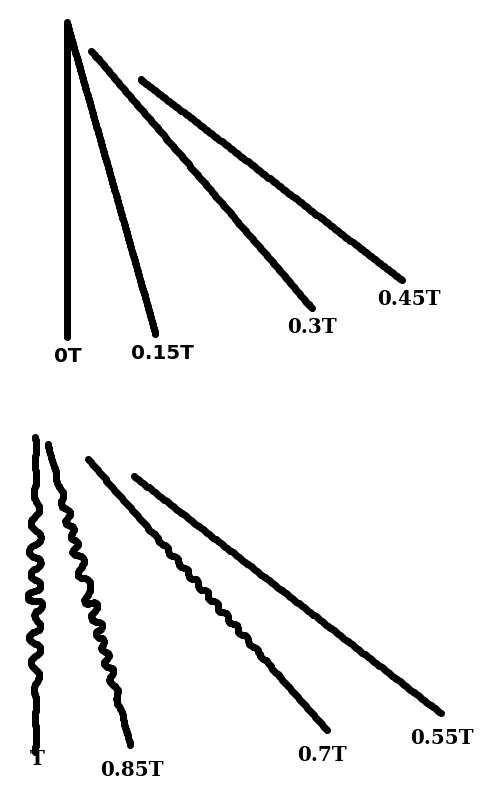

In [5]:
irun = 2
figsize = [10,7]

f,(axA) = plt.subplots(2,1,figsize=[figsize[0],figsize[1]*2])

ax1 = axA[0]
ax2 = axA[1]

dirname = dirs[2]
snapt = NP.array([0,0.15,0.3,0.45])
ax1 = snap_one(ax1,dirname,omega[irun],snapt[0],'ko-',txt=False,legend=False)
ax1.text(-0.05,-0.1,'0T',fontsize=20,weight='bold')
for ifig in range(1,4):
    ax1 = snap_one(ax1,dirname,omega[irun],snapt[ifig],'ko-',txt=True,legend=False)
ax1.set_aspect('equal')

snapt = NP.array([0.55,0.7,0.85,1])
ax2 = snap_one(ax2,dirname,omega[irun],snapt[3],'ko-',txt=False,legend=False)
ax2.text(-0.02,0.08,'T',fontsize=20,weight='bold')
for ifig in range(3):
    ax2 = snap_one(ax2,dirname,omega[irun],snapt[ifig],'ko-',txt=True,legend=False)
ax2.set_aspect('equal')

for i in range(2):
    ax = axA[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

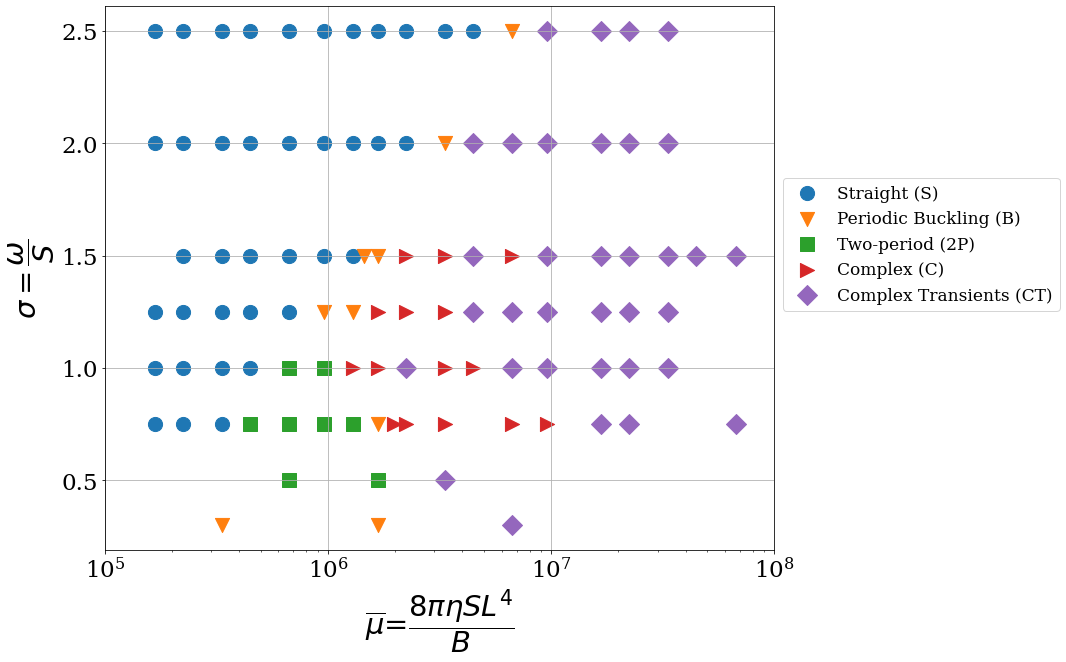

In [6]:
## Phase diagram based on Curvature, material point
plt.rcParams.update({'font.size': size1})
viscosity = 10
SS = 2      # Shear Rate
LL = 1.28     # Length of the rod
dd = 0.005
factorBB = 1.5*(10**(-5))*(LL**4)
factorMuBar = 8*3.14*viscosity*(LL**4)*SS/factorBB

Sigma2o5_sigma = 2.5*NP.ones(16)
Sigma2o5MuBar = [factorMuBar/200,factorMuBar/150,factorMuBar/100,factorMuBar/75,factorMuBar/50,factorMuBar/35,
                factorMuBar/26, factorMuBar/20,factorMuBar/15,factorMuBar/10,factorMuBar/7.5, factorMuBar/5,
                factorMuBar/3.5, factorMuBar/2, factorMuBar/1.5,factorMuBar/1.0]
cluster_2o5 = [1,1,1,1,1,1,1,1,1,1,1,2,6,6,6,6]

Sigma2_sigma = 2*NP.ones(16)
Sigma2MuBar = [factorMuBar/200,factorMuBar/150,factorMuBar/100,factorMuBar/75,factorMuBar/50,factorMuBar/35,
                factorMuBar/26, factorMuBar/20,factorMuBar/15,factorMuBar/10,factorMuBar/7.5, factorMuBar/5,
                factorMuBar/3.5, factorMuBar/2, factorMuBar/1.5,factorMuBar/1.0]
cluster_2 = [1,1,1,1,1,1,1,1,1,2,6,6,6,6,6,6]

Sigma1o5_sigma = 1.5*NP.ones(18)
Sigma1o5MuBar = [factorMuBar/150,factorMuBar/100,factorMuBar/75,factorMuBar/50,factorMuBar/35,factorMuBar/26,factorMuBar/23,
                 factorMuBar/20,factorMuBar/15,factorMuBar/10,factorMuBar/7.5,factorMuBar/5,factorMuBar/3.5,
                 factorMuBar/2,factorMuBar/1.5,factorMuBar/1, factorMuBar/0.75,factorMuBar/0.5]
cluster_1o5 = [1,1,1,1,1,1,2,2,5,5,6,5,6,6,6,6,6,6]

Sigma1o25_sigma = 1.25*NP.ones(16)
Sigma1o25MuBar=[factorMuBar/200,factorMuBar/150,factorMuBar/100,factorMuBar/75,factorMuBar/50,factorMuBar/35,
                factorMuBar/26, factorMuBar/20,factorMuBar/15,factorMuBar/10,factorMuBar/7.5, factorMuBar/5,
                factorMuBar/3.5, factorMuBar/2, factorMuBar/1.5,factorMuBar/1.0]
cluster_1o25 = [1,1,1,1,1,2,2,5,5,5,6,6,6,6,6,6]


Sigma1_sigma = 1*NP.ones(16)
Sigma1MuBar = [factorMuBar/200,factorMuBar/150,factorMuBar/100,factorMuBar/75,factorMuBar/50,factorMuBar/35,
                factorMuBar/26, factorMuBar/20,factorMuBar/15,factorMuBar/10,factorMuBar/7.5, factorMuBar/5,
                factorMuBar/3.5, factorMuBar/2, factorMuBar/1.5,factorMuBar/1.0]
cluster_1 = [1,1,1,1,3,3,5,5,6,5,5,6,6,6,6,6]

Sigma0o75_sigma = 0.75*NP.ones(16)
Sigma0o75MuBar = [factorMuBar/200,factorMuBar/150,factorMuBar/100,factorMuBar/75,factorMuBar/50,factorMuBar/35,
                  factorMuBar/26,factorMuBar/20,factorMuBar/17,factorMuBar/15,factorMuBar/10,
                  factorMuBar/5, factorMuBar/3.5,factorMuBar/2,factorMuBar/1.5,factorMuBar/0.5]
cluster_0o75=[1,1,1,3,3,3,3,2,5,5,5,5,5,6,6,6]

Sigma0o5_sigma = 0.5*NP.ones(3)
Sigma0o5MuBar = [factorMuBar/50,factorMuBar/20, factorMuBar/10]
cluster_0o5=[3,3,6]

Sigma0o3_sigma = 0.3*NP.ones(3)
Sigma0o3MuBar = [factorMuBar/100,factorMuBar/20,factorMuBar/5]
cluster_0o3=[2,2,6]

xx = NP.hstack((Sigma2o5MuBar,Sigma2MuBar,Sigma1o5MuBar,Sigma1o25MuBar,Sigma1MuBar,Sigma0o75MuBar,Sigma0o5MuBar,
                Sigma0o3MuBar))
yy = NP.hstack((Sigma2o5_sigma,Sigma2_sigma,Sigma1o5_sigma,Sigma1o25_sigma,Sigma1_sigma,Sigma0o75_sigma,Sigma0o5_sigma,
                Sigma0o3_sigma))
cluster = NP.hstack((cluster_2o5,cluster_2,cluster_1o5,cluster_1o25,cluster_1,cluster_0o75,cluster_0o5,cluster_0o3))
# Different Lengths --  should be drawn in different colours

fig, ax = plt.subplots(figsize=(12,10))
ax.grid(True)
plt.xlabel('$\overline{\mu}$=$\dfrac{8\pi\eta S L^4}{B}$',fontsize=size0)
plt.ylabel('$\sigma=\dfrac{\omega}{S}$',fontsize=size0)
plt.xlim((10**5,10**8))
ax.scatter(xx[cluster==1],yy[cluster==1], s=200,marker='o',label='Straight (S)')
ax.scatter(xx[cluster==2],yy[cluster==2], s=200,marker='v',label='Periodic Buckling (B)')
ax.scatter(xx[cluster==3],yy[cluster==3], s=200,marker='s',label='Two-period (2P)')
# ax.scatter(xx[cluster==7],yy[cluster==7], s=200,marker='*',label='Long transient 2-period')
# ax.scatter(xx[cluster==4],yy[cluster==4], s=200,marker='<',label='higher period than 2')
ax.scatter(xx[cluster==5],yy[cluster==5], s=200,marker='>',label='Complex (C)')
ax.scatter(xx[cluster==6],yy[cluster==6], s=200,marker='D',label='Complex Transients (CT)')
ax.set_xscale('log')
# ax.set_xlim([2*10**5,5*10**8])
# ax.set_ylim(ymax=3.5)
ax.legend(fontsize=size3,bbox_to_anchor=(1, 0.7))
ax.tick_params(axis='x',labelsize=size1)
ax.tick_params(axis='y',labelsize=size1)

if writefig==True:
    fig.savefig("pics/PhaseDiagramlegend"+figextension,bbox_inches='tight')

[ 1.45623188  0.66986667  6.69866667  3.34933333 16.74666667]
[1.5  0.75 0.75 1.5  1.5 ]


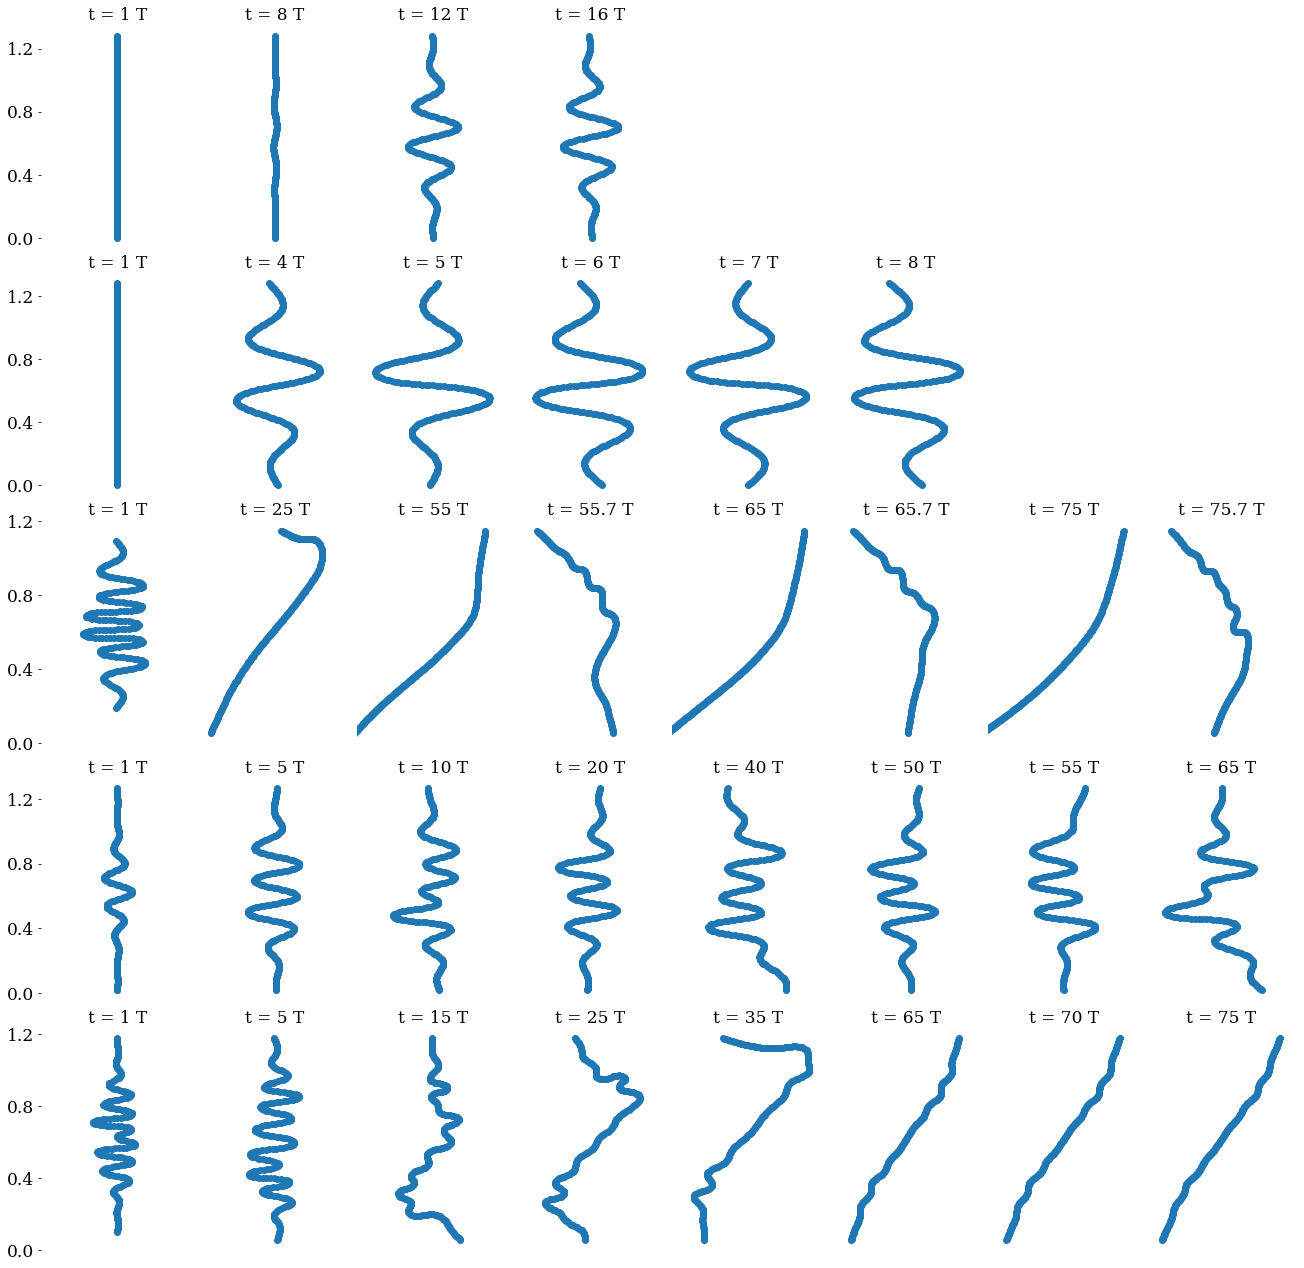

In [7]:
# Folname3 = "../27_tracerVelocity/"
Folder=["sigma1.5_facA23/output/", "sigma0.75_facA50/output/",
        "sigma0.75_facA5/output/","sigma1.5_facA10/output/",
        "sigma1.5_facA2/output/"]
Folder = [rootdir+dirname+'/' for dirname in Folder]
Folder = NP.array(Folder)
omega2 = NP.array([3,1.5,1.5,3,3])
fBB = NP.array([23,50,5,10,2])
MuB = 8*3.14*10.*2.*1.28**4/(fBB*10**(-5)*1.5*1.28**4)
print(MuB/10**6)
print(omega2/2)
nFol = 5

fig = plt.figure(constrained_layout=True)
gs = GridSpec(ncols=8, nrows=nFol, figure=fig)
fig.set_size_inches(18, 3.5*nFol)

pers=[[1,8,12,16],
      [1,4,5,6,7,8],
      [1,25,55,55.7,65,65.7,75,75.7],
      [1,5,10,20,40,50,55,65],
      [1,5,15,25,35,65,70,75]
     ]
xlimit = [
          [0.10,0.05,0.05,0.05],
          [0.10,0.10,0.10,0.10,0.10,0.10],
          [0.10,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
          [0.10,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
          [0.10,0.10,0.2,0.2,0.2,0.3,0.3,0.3]
        ]
for iFol in range(nFol):
#     tt=NP.loadtxt(Folder[iFol]+'time.txt')
    xlim = 0
    for iper in range(NP.array(pers[iFol]).shape[0]):
        TT=2*NP.pi/omega2[iFol]
        isnap=int(NP.around(50*TT*pers[iFol][iper]))
        
        dd=NP.loadtxt(Folder[iFol]+"var"+str(isnap)+".txt")
        ax = fig.add_subplot(gs[iFol, iper])
        ax.plot(dd[:,1],dd[:,2],'o-')
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
        if iper!= 0:
            ax.get_yaxis().set_ticks([])
        else:
            ax.set_yticks([0,0.4,0.8,1.2])
            ax.tick_params(axis='y', which='major', labelsize=size3)
            
        ax.set_title("t = "+str(pers[iFol][iper])+" T",fontsize=17)
        ax.set_xlim(NP.average(dd[:,1])-xlimit[iFol][iper],xlimit[iFol][iper]+NP.average(dd[:,1]))

/home/dhruba/vipin_data/sigma0.75_facA5/


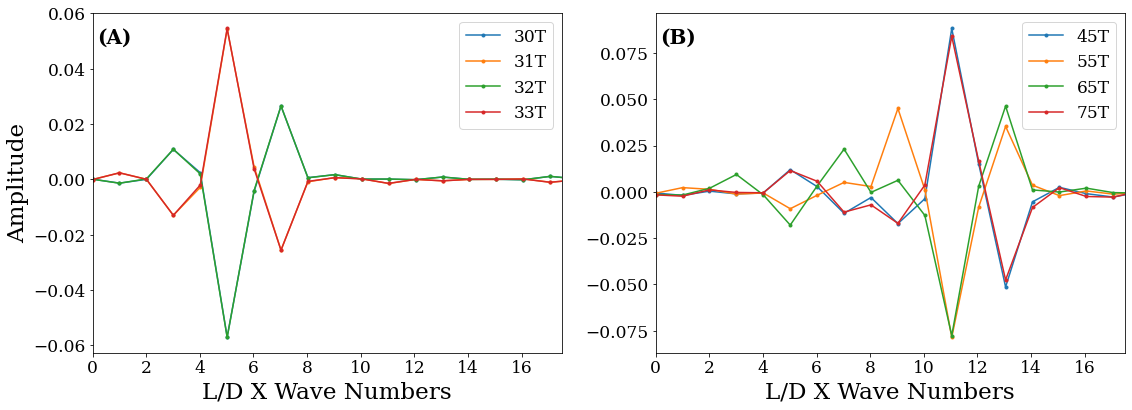

In [8]:
nr=1
nc=2
irun=4
f,axA = plt.subplots(nr,nc,figsize=[figsize2[0]*nc+wspc*nc,figsize2[1]*nr+hspc*nr])
snapt =  NP.array([30,31,32,33])
ax = SineTransform(axA[0],dirs[irun],omega[irun],snapt)
print(dirs[3])
ax.set_xlim([0,17.5])

irun=0
snapt =  NP.array([45,55,65,75])
ax = SineTransform(axA[1],dirs[irun],omega[irun],snapt)
ax.set_xlim([0,17.5])
ax.set_ylabel('')
# ax.set_title('$\overline{\mu}$ = 3.3 X $10^6$ , $\sigma = 1.5$ ',fontsize=size1)

cc=0
for ic in range(nc):
    axA[ic].text(0.01,0.91,txts[cc],fontsize=size2,weight='bold',transform=axA[ic].transAxes)
    cc=cc+1

## Complex Phase

/home/dhruba/vipin_data/sigma1.5_facA10/


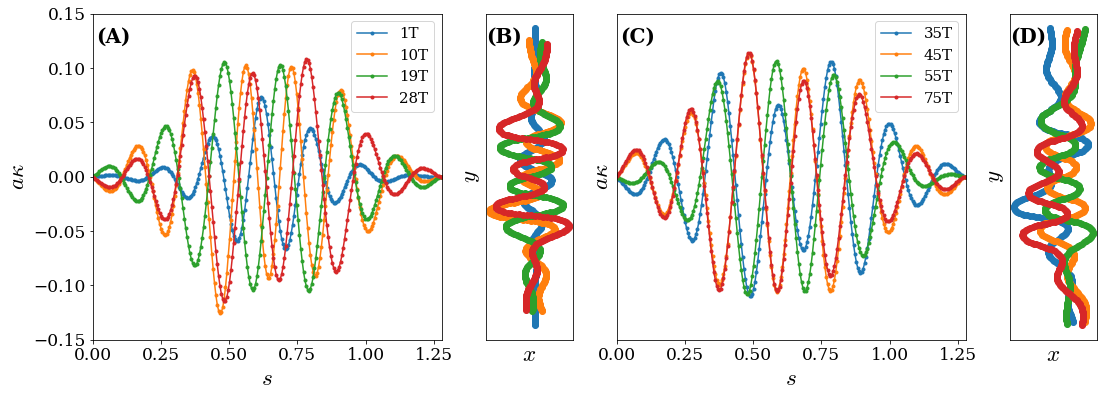

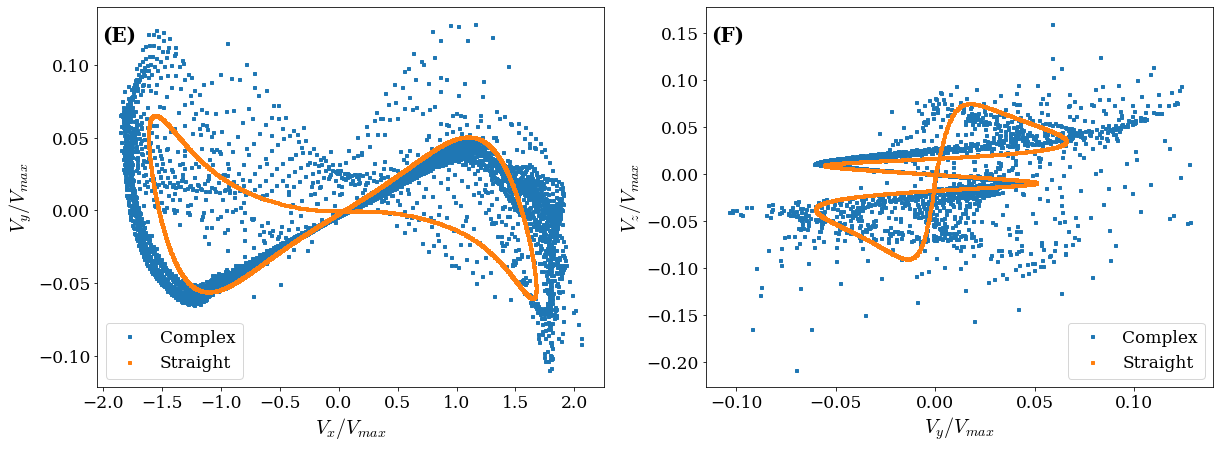

In [9]:
%matplotlib inline
irun=0
print(dirs[irun])
nr = 1
nc = 4
wspc=0
hspc=0
f,axA = plt.subplots(nr,nc,figsize=[figsize2[0]*nc/2+wspc*nc/2,figsize2[1]*nr+hspc*nr],
                     gridspec_kw={'width_ratios': [4,1,4,1]})
###############################################
snapt = NP.array(range(1,30,9))
ax = curv_compare(axA[0],dirs[irun],omega[irun],snapt)
ax.set_ylim([-0.15,0.15])
ax.set_xlim([0,1.28])
hdis=[0,0.10,0.2,0.3]
ax = snap(axA[1],dirs[irun],omega[irun],snapt,legend=False)
# ax.legend(fontsize = size4)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)
# ax.set_xlim(-0.05,0.35)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

snapt = NP.array([35,45,55,75])
ax = curv_compare(axA[2],dirs[irun],omega[irun],snapt)
ax.get_yaxis().set_ticks([])
ax.set_ylim([-0.15,0.15])
ax.set_xlim([0,1.28])
ax = snap(axA[3],dirs[irun],omega[irun],snapt,legend=False)
# ax.set_xlim(-0.08,0.40)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)

cc=0
for ic in range(nc):
    axA[ic].text(0.01,0.91,txts[cc],fontsize=size2,weight='bold',transform=axA[ic].transAxes)
    cc=cc+1
if writefig:
    plt.savefig("pics/ComplexPhaseEndCurvatureSnap"+figextension)

nc=2
f,axA = plt.subplots(1,nc,figsize=[figsize[0]*2,figsize[1]])
ax1=axA[0]
ax2=axA[1]
ax = VtrPlot(ax1,dirs[irun],omega[irun],35,75,ind1=1,ind2=2,label='Complex')
VtrSt=1/2.56*NP.load(rootdir+"sigma1.5_facA100/output/Vtracer2.npy")
ax.plot(VtrSt[0:-1,1],VtrSt[0:-1,2],'s',ms=3,label='Straight')
ax.legend(fontsize=size3)
ax = VtrPlot(ax2,dirs[irun],omega[irun],45,75,ind1=2,ind2=0,label='Complex')
ax.plot(VtrSt[0:-1,2],VtrSt[0:-1,0],'s',ms=3,label='Straight')
ax.legend(fontsize=size3,loc=4)
# ################################################
for ic in range(nc):
    axA[ic].text(0.01,0.91,txts[cc],fontsize=size2,weight='bold',transform=axA[ic].transAxes)
    cc=cc+1
if writefig:
    plt.savefig("pics/ComplexPhaseEndTracer"+figextension)

### Mixing of Lagrangian tracers

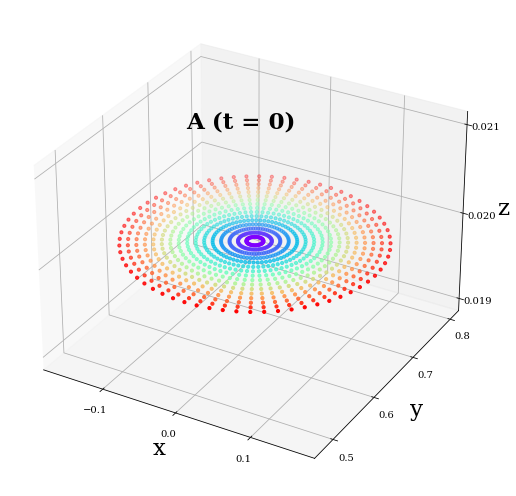

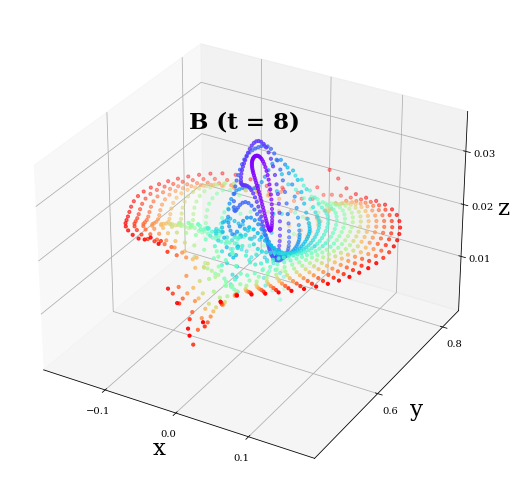

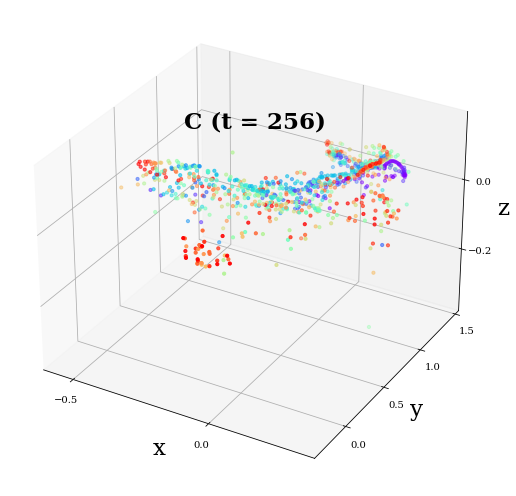

In [10]:
irun=7
dirname=dirs[irun]
fig=plt.figure(figsize=figsize)
ax=fig.add_subplot(1,1,1,projection='3d')
tracerPlot(ax,dirname,omega[irun],0,ntr=1024)
ax.text(-0.1,0.65,0.021,'A (t = 0)',fontsize=size1,weight='bold')
plt.tight_layout()
if writefig:
    plt.savefig("pics/MixingA"+figextension)
#
fig=plt.figure(figsize=figsize)
ax=fig.add_subplot(1,1,1,projection='3d')
tracerPlot(ax,dirname,omega[irun],8,ntr=1022)
ax.text(-0.1,0.65,0.035,'B (t = 8)',fontsize=size1,weight='bold')
plt.tight_layout()
if writefig:
    plt.savefig("pics/MixingC"+figextension)
#
fig=plt.figure(figsize=figsize)
ax=fig.add_subplot(1,1,1,projection='3d')
tracerPlot(ax,dirname,omega[irun],256,ntr=1024-16)
ax.text(-0.4,0.65,0.15,'C (t = 256)',fontsize=size1,weight='bold')
plt.tight_layout()
if writefig:
    plt.savefig("pics/MixingF"+figextension)

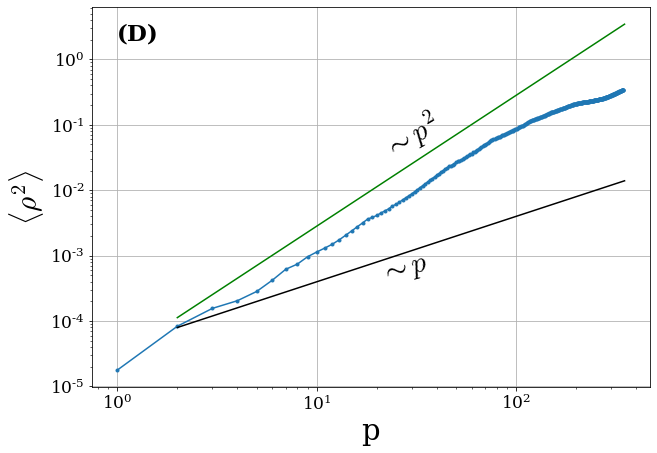

In [11]:
irun=7
dirname=dirs[irun]
rem_par = 16
plt.figure(figsize=figsize)
ntr = NP.loadtxt(dirname+'output/tracer0.txt').shape[0]-rem_par
ind = minTracerDisplacementIndex(dirname,omega[irun],ntr)
MSD = DiffCoeff(dirname,omega[irun],ind=ind,nparticles=ntr,cy1=10)
plt.loglog(NP.arange(1,MSD.shape[0]),MSD[1:],'.-',label='Mean square displacement')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

x = NP.linspace(2,350,2)
y = (x**1)*(10**(-4.40))
plt.loglog(x,y,'k-',label='Line with slope 1')

x = NP.linspace(2,350,2)
y = (x**2)*(10**(-4.55))
plt.loglog(x,y,'g-', label = 'Line with slope 2')

plt.tick_params(axis='x',labelsize=size3)
plt.tick_params(axis='y',labelsize=size3)
plt.xlabel('p',fontsize=size0)
plt.ylabel(r'$\langle\rho^2\rangle$',fontsize=size0)
plt.text(1,2,'(D)',fontsize=size1,weight='bold')
plt.text(20,0.03,'$\sim p^2$',fontsize=size0,rotation=30)
plt.text(20,0.0004,'$\sim p$',fontsize=size0,rotation=15)
# ax.text(1.5,0.02,'slope = -2.95',fontwsize=size3,rotation=330)
plt.grid(True)
if writefig:
    plt.savefig("pics/diffusion_coefficient"+figextension)

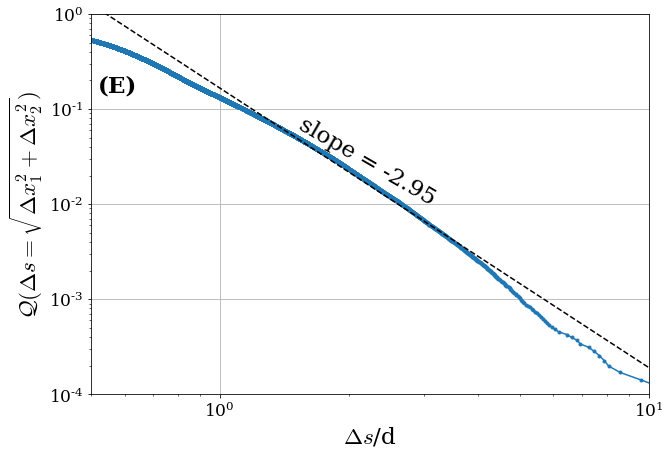

In [12]:
irun = 7
rmp = 32
ind = minTracerDisplacementIndex(dirs[irun],omega[irun],1024-rmp)
xp,pdfxp,xn,pdfxn,yp,pdfyp,yn,pdfyn,zp,pdfzp,zn,pdfzn,alldisp = PDF_disp(dirs[irun],omega[irun],ind)

def Plot2D(ax,x,y,symbol='.-',plt_type='',xlabel=False,ylabel=False,title=False,label='',grid=False):
    if plt_type=='':
        ax.plot(x,y,symbol,label=label)
    elif plt_type=='semilogy':
        ax.semilogy(x,y,symbol,label=label)
    elif plt_type=='loglog':
        ax.loglog(x,y,symbol,label=label)
    
    plt.tick_params(axis='x',labelsize=size3)
    plt.tick_params(axis='y',labelsize=size3)
    if xlabel:
        ax.set_xlabel(xlabel,fontsize = size1)
    if ylabel:
        ax.set_ylabel(ylabel,fontsize = size1)
    if grid:
        ax.grid(True)

ds = NP.sqrt(alldisp[:,1]*alldisp[:,1] + alldisp[:,2]*alldisp[:,2])
ss,pdfss = rank_order(ds)
f,ax = plt.subplots(1,1,figsize=[figsize[0],figsize[1]])
Plot2D(ax,ss[0:-1:10],pdfss[0:-1:10],plt_type='loglog',xlabel='$\Delta s$/d',
       ylabel='$\mathcal{Q}(\Delta s = \sqrt{\Delta x_1^2+\Delta x_2^2})$',grid=True)
nmin=320000
nmax=352100
coeff = NP.polyfit(NP.log10(ss[nmin:nmax]),NP.log10(pdfss[nmin:nmax]),1)
x = NP.linspace(0.5,10,2)
y = (x**coeff[0])*(10**(coeff[1]))
Plot2D(ax,x,y,symbol='k--',label='Best fit line')
ax.text(1.5,0.01,'slope = -2.95',fontsize=size1,rotation=330)
ax.text(0.52,0.15,'(E)',fontsize=size1,weight='bold')
ax.set_xlim([0.5,10])
ax.set_ylim([0.0001,1])
#
if writefig:
    plt.savefig("pics/CPDF_ss_loglog"+figextension)

/home/dhruba/vipin_data/sigma1.5_facA10/


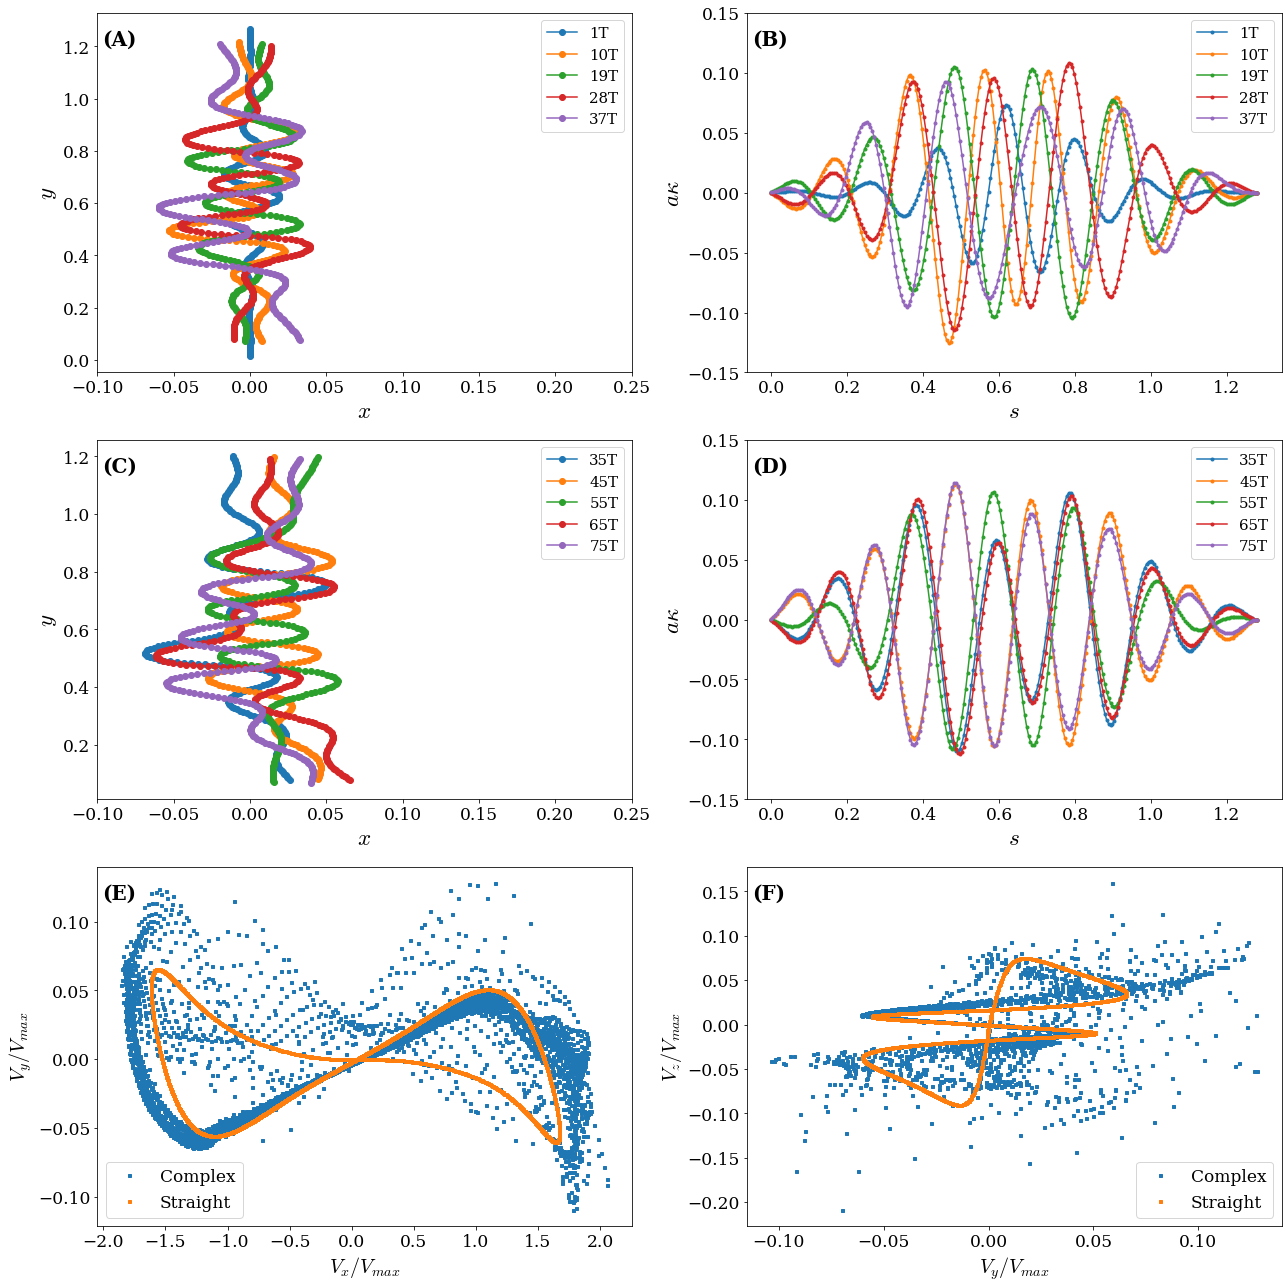

In [13]:
irun=0
print(dirs[irun])
nr = 3
nc = 2

f,axA = plt.subplots(nr,nc,figsize=[figsize2[0]*nc+wspc*nc,figsize2[1]*nr+hspc*nr])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspc, hspace=hspc)
###############################################
snapt = NP.array(range(1,43,9))
ax = snap(axA[0][0],dirs[irun],omega[irun],snapt)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)

ax.set_xlim(-0.1,0.25)
ax = curv_compare(axA[0][1],dirs[irun],omega[irun],snapt)
ax.set_ylim([-0.15,0.15])
###############################################
snapt = NP.array([35,45,55,65,75])
ax = snap(axA[1][0],dirs[irun],omega[irun],snapt)
ax.set_xlim(-0.1,0.25)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)

ax = curv_compare(axA[1][1],dirs[irun],omega[irun],snapt)
ax.set_ylim([-0.15,0.15])
################################################
ax = VtrPlot(axA[2][0],dirs[irun],omega[irun],35,75,ind1=1,ind2=2,label='Complex')
VtrSt=1/2.56*NP.load(rootdir+"sigma1.5_facA100/output/Vtracer2.npy")
ax.plot(VtrSt[0:-1,1],VtrSt[0:-1,2],'s',ms=3,label='Straight')
ax.legend(fontsize=size3)
ax = VtrPlot(axA[2][1],dirs[irun],omega[irun],45,75,ind1=2,ind2=0,label='Complex')
ax.plot(VtrSt[0:-1,2],VtrSt[0:-1,0],'s',ms=3,label='Straight')
ax.legend(fontsize=size3,loc=4)
################################################
cc=0
for ir in range(nr):
    for ic in range(nc):
        axA[ir][ic].text(0.01,0.91,txts[cc],fontsize=size2,weight='bold',transform=axA[ir][ic].transAxes)
        cc=cc+1
plt.tight_layout()
if writefig:
    plt.savefig("pics/ComplexPhaseEnd"+figextension)

## Complex  phase

/home/dhruba/vipin_data/sigma0.75_facA5/


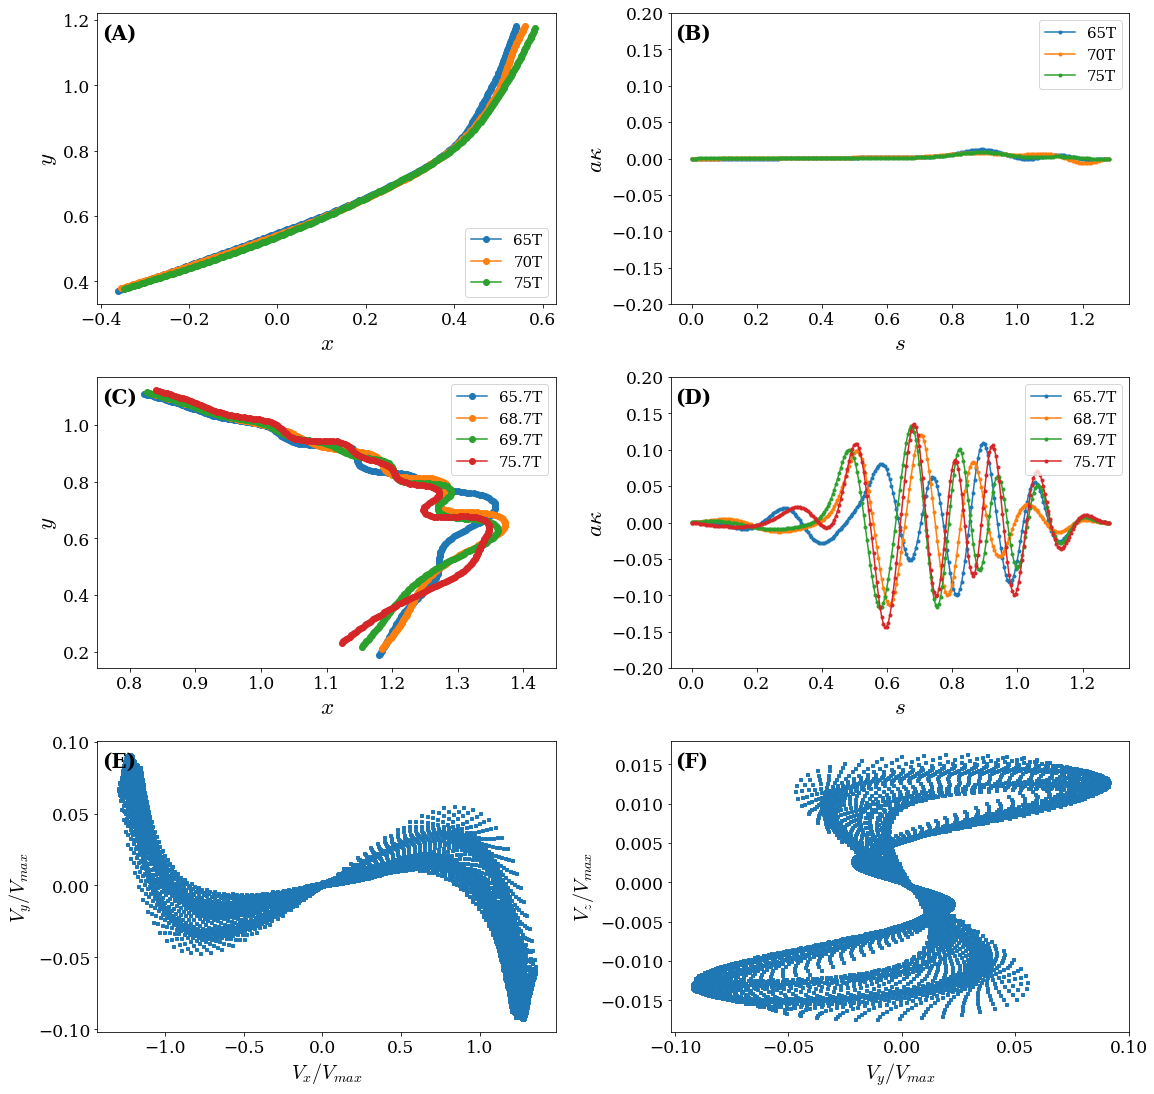

In [14]:
irun=3
print(dirs[irun])
nr = 3
nc = 2

hspc=0.25
wspc=0.25

f,axA = plt.subplots(nr,nc,figsize=[figsize2[0]*nc+wspc*nc,figsize2[1]*nr+hspc*nr])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspc, hspace=hspc)
###############################################
snapt = NP.array([65,70,75])
ax = curv_compare(axA[0][1],dirs[irun],omega[irun],snapt)
ax.set_ylim([-0.2,0.2])
ax = snap(axA[0][0],dirs[irun],omega[irun],snapt)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)
ax.legend(fontsize=size4, loc=4)
################################################
snapt = NP.array([65.70,68.7,69.7,75.70])
hdis=[0,0.12,0.24,0.36]
ax = snap(axA[1][0],dirs[irun],omega[irun],snapt)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)
ax.set_xlim(0.75,1.45)
# ax.get_xaxis().set_ticks([])
ax = curv_compare(axA[1][1],dirs[irun],omega[irun],snapt)
ax.set_ylim(-0.2,0.2)
ax.legend(fontsize=size4, loc=1)
################################################
ax = VtrPlot(axA[2][0],dirs[irun],omega[irun],25,75,ind1=1,ind2=2,marker='s',label='Complex')
VtrSt=1/2.56*NP.load(rootdir+"sigma1.5_facA100/output/Vtracer"+str(VtrPoint[irun])+".npy")
ax = VtrPlot(axA[2][1],dirs[irun],omega[irun],25,75,ind1=2,ind2=0,marker='s',label='Complex')
cc=0
for ir in range(nr):
    for ic in range(nc):
        axA[ir][ic].text(0.01,0.91,txts[cc],fontsize=size2,weight='bold',transform=axA[ir][ic].transAxes)
        cc=cc+1

if writefig:
    plt.savefig("pics/ComplexPhaseBetween"+figextension)

## Complex--Transient phase

/home/dhruba/vipin_data/sigma1.5_facA1/


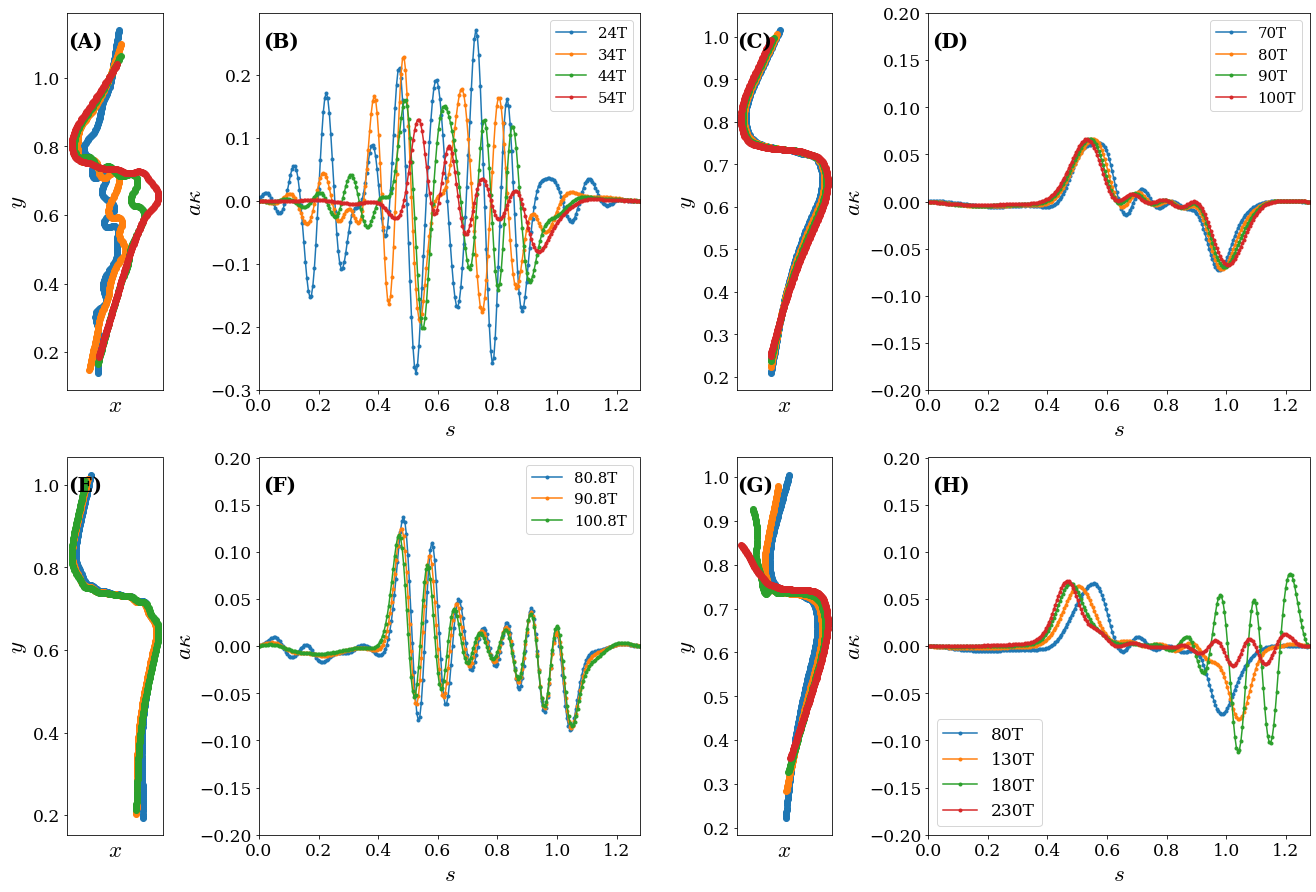

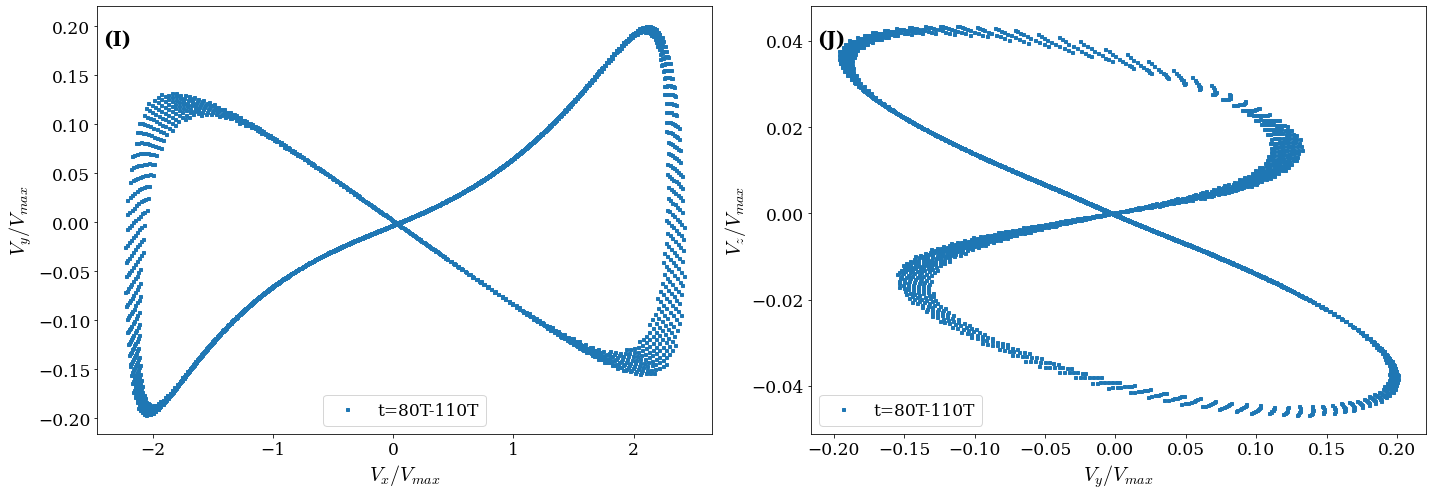

In [15]:
irun=2
print(dirs[irun])
idim=3
nr=2
nc=4
f,axA = plt.subplots(nr,nc,figsize=[figsize2[0]*nc/2+wspc*nc/2,figsize2[1]*nr+hspc*nr],
                     gridspec_kw={'width_ratios': [1,4,1,4]})
# f,(ax1,ax2) = plt.subplots(1,2,figsize=[figsize[0]*2,figsize[1]])
# snapt = NP.array(range(1,50,10))
ax1=axA[0][0]
snapt = NP.array([24,34,44,54])
ax = snap(ax1,dirs[irun],omega[irun],snapt,legend=False)
ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)

ax2=axA[0][1]
ax = curv_compare(ax2,dirs[irun],omega[irun],snapt)
ax.set_xlim([0,1.28])
plt.tight_layout()
################################################
# f,(ax1,ax2) = plt.subplots(1,2,figsize=[figsize[0]*2,figsize[1]])
ax1=axA[0][2]
snapt = NP.array([70,80,90,100])
ax = snap(ax1,dirs[irun],omega[irun],snapt,legend=False)
ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)

ax2=axA[0][3]
ax = curv_compare(ax2,dirs[irun],omega[irun],snapt)
ax.set_xlim([0,1.28])
ax.set_ylim(-0.2,0.2)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
################################################
# f,(ax1,ax2) = plt.subplots(1,2,figsize=[figsize[0]*2,figsize[1]])
ax1=axA[1][0]
snapt = NP.array([80.8,90.8,100.8])
ax = snap(ax1,dirs[irun],omega[irun],snapt,legend=False)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)
ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])

ax2=axA[1][1]
ax = curv_compare(ax2,dirs[irun],omega[irun],snapt)
ax.set_xlim([0,1.28])
ax.set_ylim(-0.2,0.2)
plt.tight_layout()
# ax.set_ylim([-0.05,0.05])
################################################
# f,(ax1,ax2) = plt.subplots(1,2,figsize=[figsize[0]*2,figsize[1]])
ax1=axA[1][2]
snapt = NP.array([80,130,180,230])
ax = snap(ax1,dirs[irun],omega[irun],snapt,legend=False)
ax.set_ylabel('$y$', fontsize = size1)
ax.set_xlabel('$x$',fontsize = size1)
ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])

ax2=axA[1][3]
ax = curv_compare(ax2,dirs[irun],omega[irun],snapt)
ax.set_xlim([0,1.28])
ax.set_ylim(-0.2,0.2)
# ax.get_yaxis().set_ticks([])
ax.legend(fontsize=size3,loc=3)

cc=0
for ir in range(nr):
    for ic in range(nc):
        axA[ir][ic].text(0.01,0.91,txts[cc],fontsize=size2,weight='bold',transform=axA[ir][ic].transAxes)
        cc=cc+1

if writefig:
    plt.savefig("pics/CTsnapcurv"+figextension)
################################################
f,(ax1,ax2) = plt.subplots(1,2,figsize=[figsize[0]*2,figsize[1]])
ax1 = VtrPlot(ax1,dirs[irun],omega[irun],80,110,ind1=1,ind2=2,label='t=80T-110T')
ax1.legend(fontsize=size3,loc=8)
ax1.text(0.01,0.91,'(I)',fontsize=size2,weight='bold',transform=ax1.transAxes)
ax2 = VtrPlot(ax2,dirs[irun],omega[irun],80,110,ind1=2,ind2=0,label='t=80T-110T')
ax2.legend(fontsize=size3,loc=3)
ax2.text(0.01,0.91,'(J)',fontsize=size2,weight='bold',transform=ax2.transAxes)
plt.tight_layout()
if writefig:
    plt.savefig("pics/CTvtr"+figextension)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

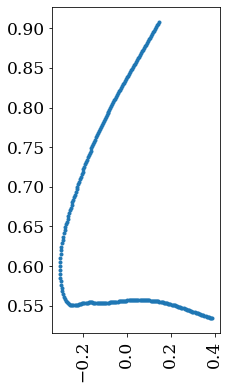

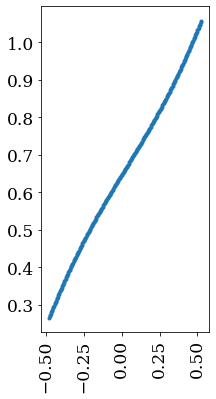

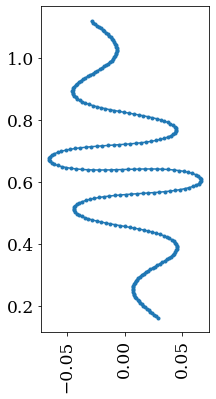

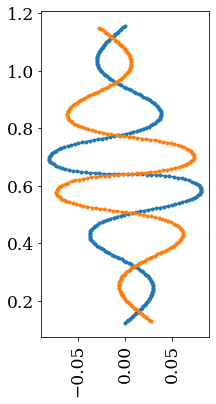

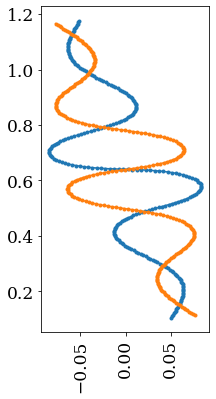

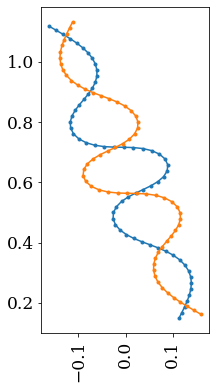

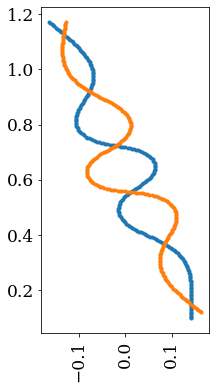

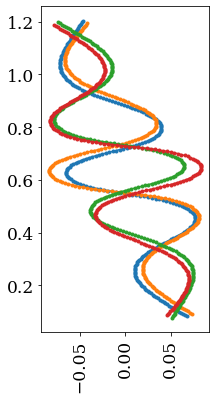

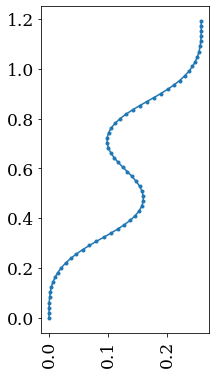

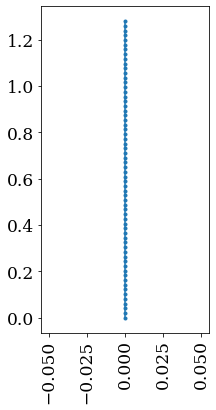

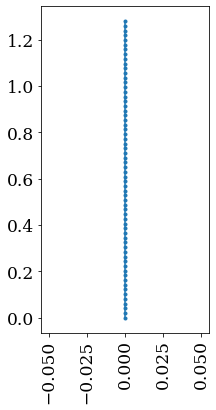

In [16]:
locs = ['200','100','060','050','040','020','010','002']
fBB = NP.array([float(xx) for xx in locs])
MuB = 8*3.14*10.*2.*1.28**4/(fBB*10**(-5)*1.5*1.28**4)
datadirMap = rootdir+datamap
size = [3,6]

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"002/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"010/1/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"020/7/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"040/5_2per/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.-', label='n=1')
plt.plot(dd[1,1::2],dd[1,2::2],'.-', label='n=2')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"050/5_2per/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.-',label='n=1')
plt.plot(dd[1,1::2],dd[1,2::2],'.-',label='n=2')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"050/4_2per/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.-')
plt.plot(dd[1,1::2],dd[1,2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"060/4_2per/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.-')
plt.plot(dd[1,1::2],dd[1,2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"060/5_4per/PSI")
plt.plot(dd[0,1::2],dd[0,2::2],'.-')
plt.plot(dd[1,1::2],dd[1,2::2],'.-')
plt.plot(dd[2,1::2],dd[2,2::2],'.-')
plt.plot(dd[3,1::2],dd[3,2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"100/3/PSI")
plt.plot(dd[1::2],dd[2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"125/0/PSI")
plt.plot(dd[1::2],dd[2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)

plt.figure(figsize=size)
dd = NP.loadtxt(datadirMap+"125/0/PSI")
plt.plot(dd[1::2],dd[2::2],'.-')
plt.xticks(fontsize=size3,rotation=90)
plt.yticks(fontsize=size3)